<a href="https://colab.research.google.com/github/anandhulk/Quora-sincere-and-insincere-questions-classification/blob/main/Bidirectional_moldel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.utils import shuffle
import spacy
nlp = spacy.load("en_core_web_sm")
import pickle

In [3]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data=pd.read_csv('/content/drive/MyDrive/dataset-quora/quora-insincere-questions-classification.csv') 
data

,qid,question_text,target
0,15da7c4e27ac869f4aa7,Is GRE necessary for McGill Univ (MS Data Scie...,0
1,77d18c4e4cb6daa80a8b,My friend has been being hit and has been rape...,0
2,07bff8b96d97de055509,Which one is better software engineering or IT...,0
3,cad3d16d35695a8fcea5,What does the U symbol on food mean?,0
4,a7938e05bdbb8e3e3caa,Which book should read for general engineering...,0
...,...,...,...
181515,fffeba722d9b371bd1b9,How is it to have intimate relation with your ...,1
181516,fffee269360dd0d3947a,Why is it when singers have lyrics about voice...,1
181517,ffff0e4ea1bb6e16feec,Do pakis smell of curry and shit?,1
181518,ffff3f0a2449ffe4b9ff,Isn't Trump right after all? Why should the US...,1


In [6]:
data=data.dropna()

In [7]:
data.target.value_counts()

0    100710
1     80810
Name: target, dtype: int64

# **Lemmatization**

In [ ]:
def lemmatize(df):
    res=[]
    count=df.shape[0]
    
    for row in df:
        doc=nlp(row)
        row=" ".join([w.lemma_ for w in nlp(row)])
        res.append(row)
        count=count-1
        
        if(count%5000==0):
            print("Remaining no. of rows= ",count)
            
    res=pd.Series(res)
    return res

In [ ]:
lemmatized_x=lemmatize(data['question_text'])

Remaining no. of rows=  180000
Remaining no. of rows=  175000
Remaining no. of rows=  170000
Remaining no. of rows=  165000
Remaining no. of rows=  160000
Remaining no. of rows=  155000
Remaining no. of rows=  150000
Remaining no. of rows=  145000
Remaining no. of rows=  140000
Remaining no. of rows=  135000
Remaining no. of rows=  130000
Remaining no. of rows=  125000
Remaining no. of rows=  120000
Remaining no. of rows=  115000
Remaining no. of rows=  110000
Remaining no. of rows=  105000
Remaining no. of rows=  100000
Remaining no. of rows=  95000
Remaining no. of rows=  90000
Remaining no. of rows=  85000
Remaining no. of rows=  80000
Remaining no. of rows=  75000
Remaining no. of rows=  70000
Remaining no. of rows=  65000
Remaining no. of rows=  60000
Remaining no. of rows=  55000
Remaining no. of rows=  50000
Remaining no. of rows=  45000
Remaining no. of rows=  40000
Remaining no. of rows=  35000
Remaining no. of rows=  30000
Remaining no. of rows=  25000
Remaining no. of rows= 

In [ ]:
lemma=pd.DataFrame({'questions':lemmatized_x})

In [ ]:
lemma.to_csv("/content/drive/MyDrive/dataset-quora/lemma.csv",index=False)

# Data cleaning(removing ?.!*@#%*_+}{ etc..)

In [13]:
import re

def clean_text(series):
    res=[]
    for row in series:
        text = re.sub(r'[^(a-zA-Z)\s]','', row)
        text=text.lower()
        res.append(text)
    res=pd.Series(res)
    return res

In [ ]:
cleaned_x=clean_text(lemmatized_x)

In [ ]:
cleaned_x

0         be GRE necessary for McGill Univ ( MS Data Sci...
1         my friend have be be hit and have be rape by h...
2         which one be well software engineering or it e...
3                        what do the U symbol on food mean 
4         which book should read for general engineering...
                                ...                        
181515    how be it to have intimate relation with your ...
181516    why be it when singer have lyric about voice i...
181517                     do paki smell of curry and shit 
181518    be not trump right after all  why should the U...
181519                      be you ashamed of be an indian 
Length: 181520, dtype: object

In [ ]:
y=data["target"]
y

0         0
1         0
2         0
3         0
4         0
         ..
181515    1
181516    1
181517    1
181518    1
181519    1
Name: target, Length: 181520, dtype: int64

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,Dropout
from tensorflow.keras.layers import Embedding,Bidirectional,LSTM,GRU,GlobalMaxPool1D
from sklearn.model_selection import train_test_split

# **Tokenizing**

In [ ]:
vocab_size=50000
max_len=100
tokenizer=Tokenizer(num_words=vocab_size)
fit_text=list(cleaned_x)

In [ ]:
tokenizer.fit_on_texts(fit_text)
text=tokenizer.texts_to_sequences(cleaned_x)

In [ ]:
print(len(tokenizer.word_index))

55536


In [ ]:
cleaned_x[2]

'which one be well software engineering or it engineering for programming app and website '

In [ ]:
text[2]

[50, 66, 1, 91, 533, 329, 25, 16, 329, 13, 912, 423, 8, 356]

# **Padding the Sequence**

In [ ]:
padded_x=pad_sequences(text,maxlen=max_len,padding='pre')

In [ ]:
padded_x

array([[   0,    0,    0, ..., 1248, 1225,  331],
       [   0,    0,    0, ...,    4,    2,  451],
       [   0,    0,    0, ...,  423,    8,  356],
       ...,
       [   0,    0,    0, ..., 6183,    8,  864],
       [   0,    0,    0, ...,   83,   39, 3741],
       [   0,    0,    0, ...,    1,   39,   77]], dtype=int32)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(padded_x,y,random_state=42,test_size=0.2)
xtrain.shape,ytrain.shape

((145216, 100), (145216,))

# **BIDIRECTIONAL LSTM MODEL**

In [ ]:
model=Sequential([
    Embedding(vocab_size,360,input_length=max_len),
    Bidirectional(LSTM(128,return_sequences=True)),
    Dropout(0.4),
    Bidirectional(LSTM(64,return_sequences=True)),
    Dropout(0.4),
    Bidirectional(LSTM(32,return_sequences=True)),
    GlobalMaxPool1D(),
    Dense(10,activation="relu"),
    Dropout(0.2),
    Dense(1,activation="sigmoid")
])

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=METRICS)


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 360)          18000000  
                                                                 
 bidirectional_3 (Bidirectio  (None, 100, 256)         500736    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 100, 256)          0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 100, 128)         164352    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 100, 128)          0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 100, 64)         

In [ ]:
model.fit(xtrain,ytrain,epochs=2,validation_data=(xtest,ytest))

Epoch 1/2
4538/4538 [==============================] - 205s 44ms/step - loss: 0.3241 - accuracy: 0.8774 - precision: 0.8548 - recall: 0.8724 - val_loss: 0.2825 - val_accuracy: 0.8853 - val_precision: 0.8251 - val_recall: 0.9435
Epoch 2/2
4538/4538 [==============================] - 196s 43ms/step - loss: 0.2465 - accuracy: 0.9089 - precision: 0.8814 - recall: 0.9189 - val_loss: 0.2703 - val_accuracy: 0.8963 - val_precision: 0.8787 - val_recall: 0.8912


In [ ]:
model.evaluate(xtest,ytest)

1135/1135 [==============================] - 18s 16ms/step - loss: 0.2703 - accuracy: 0.8963 - precision: 0.8787 - recall: 0.8912


[0.2703104317188263,
 0.8963199853897095,
 0.8786664009094238,
 0.8912226557731628]

In [ ]:
model.save("/content/drive/MyDrive/dataset-quora/Bidirectional_lstm_Model")

<a href="./BidirectionalLSTM"> Download File </a>

In [ ]:
# saving
with open('/content/drive/MyDrive/dataset-quora/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
# loading
with open('/content/drive/MyDrive/dataset-quora/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# **EVALUATION**

In [10]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
y_pred=model.predict(xtest)

In [ ]:
y_p=[]
for i in y_pred:
    if(i>=0.5):
        y_p.append(1)
    else:
        y_p.append(0)

In [ ]:
confusion=confusion_matrix(ytest,y_p)

# **CONFUSION MATRIX**

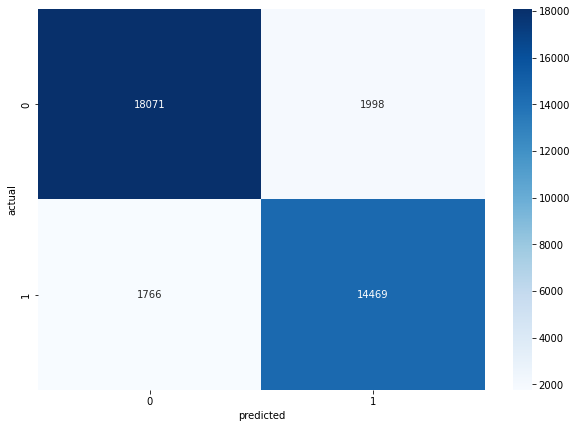

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

In [ ]:
print("     Classification report of LSTM model\n")
print(classification_report(ytest,y_p))

     Classification report of LSTM model

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     20069
           1       0.88      0.89      0.88     16235

    accuracy                           0.90     36304
   macro avg       0.89      0.90      0.90     36304
weighted avg       0.90      0.90      0.90     36304



# **PREDICTION FUNCTION**

In [ ]:
def Predict(stre):
  stre=nlp(stre)
  stre=" ".join([w.lemma_ for w in nlp(stre)])
  listt=[]
  listt.append(stre)
  listt=tokenizer.texts_to_sequences(listt)
  listt=pad_sequences(listt,maxlen=max_len,padding='pre')
  pred=model.predict(listt)
  """
  if(pred>=0.5):
    print('InSincere')
    print(pred[0][0])
  else:
    print('Sincere')
    print(pred[0][0])
    """
  print("{0:.2f}".format(pred[0][0]*100),"% InSincere")

In [ ]:
q=input("Enter your Question :")
Predict(q)

Enter your Question :how to get to a product based company after by graduation
0.15 % InSincere


# **GLOVE EMBEDDING**

In [23]:
x=clean_text(data['question_text'])

In [24]:
x

0         is gre necessary for mcgill univ (ms data scie...
1         my friend has been being hit and has been rape...
2         which one is better software engineering or it...
3                       what does the u symbol on food mean
4         which book should read for general engineering...
                                ...                        
181515    how is it to have intimate relation with your ...
181516    why is it when singers have lyrics about voice...
181517                     do pakis smell of curry and shit
181518    isnt trump right after all why should the usa ...
181519                   are you ashamed of being an indian
Length: 181520, dtype: object

# **TOKENIZATION**

In [25]:
vocab_size=50000
max_len=100
tokenizer2=Tokenizer(num_words=vocab_size)
fit_text=list(x)

In [26]:
tokenizer2.fit_on_texts(fit_text)
text2=tokenizer2.texts_to_sequences(x)

In [30]:
text2[3]

[9, 28, 1, 1238, 4260, 24, 365, 166]

In [31]:
x[3]

'what does the u symbol on food mean'

In [32]:
print(len(tokenizer2.word_index))

73016


In [33]:
# saving
with open('/content/drive/MyDrive/dataset-quora/tokenizer2.pickle', 'wb') as handle:
    pickle.dump(tokenizer2, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# loading
with open('/content/drive/MyDrive/dataset-quora/tokenizer2.pickle', 'rb') as handle:
    tokenizer2 = pickle.load(handle)

# **PADDING SEQUENCE**

In [36]:
padded_x2=pad_sequences(text2,maxlen=max_len,padding='pre')
padded_x2

array([[   0,    0,    0, ..., 1263,  459,  315],
       [   0,    0,    0, ...,    2,    1,  429],
       [   0,    0,    0, ..., 1346,    7, 1214],
       ...,
       [   0,    0,    0, ..., 7925,    7,  912],
       [   0,    0,    0, ...,   82,   36, 5756],
       [   0,    0,    0, ...,   79,   36,   80]], dtype=int32)

# **SPLITTING DATASET**

In [38]:
train_x,test_x,train_y,test_y=train_test_split(padded_x2,data['target'],random_state=42,test_size=0.2)
train_x.shape,train_y.shape

((145216, 100), (145216,))

In [39]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/dataset-quora/glove.6B.300d.txt.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/dataset-quora')

# **EMBEDDING**

In [40]:
glove_embedded = "/content/drive/MyDrive/dataset-quora/glove.6B.300d.txt"

In [41]:
def getting_glove_embedding(filename):  #Getting glove embedding in a dictionary
    file = open(filename,'r')
    lines = file.readlines()
    embedding = dict()
    for line in lines:
        parts = line.split()
        embedding[parts[0]] = np.asarray(parts[1:],dtype='float32')
        
    return(embedding)

In [42]:
def embedding_weights(vocab,raw_embedding):  #raw_embedding = getting_glove_embedding(filename)
    
    vocab_size = len(vocab)+1
    weight_matrix = np.zeros((vocab_size,300)) #each word with 300 dimensions
    
    for word , i in vocab.items():
        vector = raw_embedding.get(word)
        if vector is not None:
            weight_matrix[i] = vector
            
    return(weight_matrix)

In [43]:
raw_embedding = getting_glove_embedding(glove_embedded)
print("<<<<<<< Raw Embedding Loaded >>>>>>>")
embedding_vectors = embedding_weights(tokenizer2.word_index,raw_embedding)

<<<<<<< Raw Embedding Loaded >>>>>>>


# **MODEL**

In [61]:
gloveModel=Sequential([
    Embedding(len(tokenizer2.word_index)+1,300,weights=[embedding_vectors]),
    Bidirectional(LSTM(128,return_sequences=True)),
    Dropout(0.4),
    Bidirectional(LSTM(64,return_sequences=True)),
    Dropout(0.4),
    Bidirectional(LSTM(32,return_sequences=True)),
    GlobalMaxPool1D(),
    Dense(10,activation="relu"),
    Dropout(0.2),
    Dense(1,activation="sigmoid")
])

In [62]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

gloveModel.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=METRICS)


gloveModel.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 300)         21905100  
                                                                 
 bidirectional_16 (Bidirecti  (None, None, 256)        439296    
 onal)                                                           
                                                                 
 dropout_16 (Dropout)        (None, None, 256)         0         
                                                                 
 bidirectional_17 (Bidirecti  (None, None, 128)        164352    
 onal)                                                           
                                                                 
 dropout_17 (Dropout)        (None, None, 128)         0         
                                                                 
 bidirectional_18 (Bidirecti  (None, None, 64)        

In [63]:
gloveModel.fit(train_x,train_y,validation_data=[test_x,test_y],epochs=2)

Epoch 1/2
4538/4538 [==============================] - 215s 43ms/step - loss: 0.3093 - accuracy: 0.8829 - precision: 0.8653 - recall: 0.8725 - val_loss: 0.2537 - val_accuracy: 0.9016 - val_precision: 0.8944 - val_recall: 0.8842
Epoch 2/2
4538/4538 [==============================] - 193s 43ms/step - loss: 0.2285 - accuracy: 0.9156 - precision: 0.9037 - recall: 0.9069 - val_loss: 0.2541 - val_accuracy: 0.9023 - val_precision: 0.8858 - val_recall: 0.8973


In [65]:
gloveModel.evaluate(test_x,test_y)

1135/1135 [==============================] - 17s 15ms/step - loss: 0.2541 - accuracy: 0.9023 - precision: 0.8858 - recall: 0.8973


[0.2540549635887146, 0.9023247957229614, 0.8858011364936829, 0.897258996963501]

In [ ]:
gloveModel.save("/content/drive/MyDrive/dataset-quora/GloveModel")

# **MODEL EVALUVATION**

In [68]:
y_pred2=gloveModel.predict(test_x)
y_p=[]
for i in y_pred2:
    if(i>=0.5):
        y_p.append(1)
    else:
        y_p.append(0)
confusion=confusion_matrix(test_y,y_p)

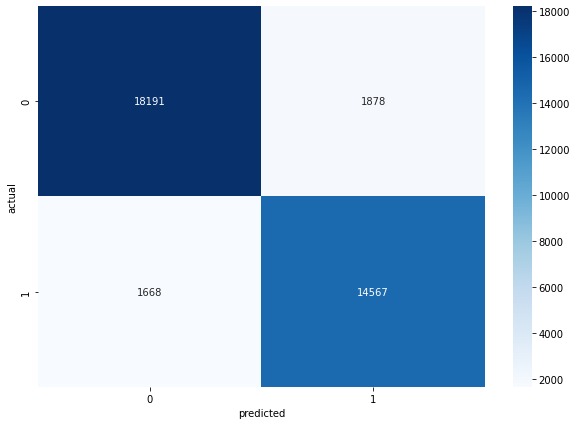

In [69]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

In [71]:
print("     Classification report of Glove LSTM model\n")
print(classification_report(test_y,y_p))

     Classification report of Glove LSTM model

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     20069
           1       0.89      0.90      0.89     16235

    accuracy                           0.90     36304
   macro avg       0.90      0.90      0.90     36304
weighted avg       0.90      0.90      0.90     36304

